# Import and Install Tools

In [127]:
import pandas as pd
import numpy as np
import geopandas as gpd
import sklearn.neighbors
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# Unpickle Files From Previous Notebooks

In [128]:
station_totals = pd.read_pickle('sorted_station_count_totals')

In [129]:
station_totals.head()

,match_name,ENTRIES,EXITS,totals
22,34 ST 123ACE,80715194,58729562,139444756
54,GRAND CENTRAL-42 ST GS4567,5528439,11402352,16930791
25,42 ST PORT AUTH ACENQRS1237,8744516,7385912,16130428
60,PARK PLACE ACE123,6666906,8220809,14887715
26,47-50 STS ROCKEFELLER CENTER BDFM7,2461312,2224908,4686220


In [130]:
distances = pd.read_pickle('campus_to_station_distace')

In [131]:
distances.head(22)

,un_name,campus,miles
0,23rd St NR,Baruch College,0.267531
1,28th St NR,Baruch College,0.389126
2,Union Square LNQR456,Baruch College,0.490399
3,23rd St FM,Baruch College,0.467442
4,23rd St 6,Baruch College,0.144956
5,28th St 6,Baruch College,0.144623
6,33rd St 6,Baruch College,0.370615
7,City Hall R,Borough of Manhattan Community College,0.392227
8,Cortlandt St R,Borough of Manhattan Community College,0.466780
9,Canal St ACE,Borough of Manhattan Community College,0.435313


## More Data Cleaning

In [132]:
## Looking at naming conventions because they are inconsistent again! Ugh.
distances[distances['un_name'].str.contains("59")]

,un_name,campus,miles
42,59th St NQR456,Hunter College,0.457535
46,59th St ABCD1,John Jay College of Criminal Justice,0.272461
47,59th St-Columbus Circle ABCD1,John Jay College of Criminal Justice,0.264790
55,59th St ABCD1,Macaulay Honors College,0.414579
57,59th St-Columbus Circle ABCD1,Macaulay Honors College,0.420022


In [133]:
## Looking at naming conventions because they are inconsistent again! Ugh.
station_totals[station_totals['match_name'].str.contains("59")]

,match_name,ENTRIES,EXITS,totals
32,59 ST-COLUMBUS CIRCLE ABCD1,575395,678688,1254083
31,59 ST NQR456,217594,162576,380170


In [134]:
## Remove extra ST/RD/TH letters that occur in MTA count data and convert to upper so strings are more compatible
distances.un_name = distances.un_name.map(str.upper)
distances.un_name = distances.un_name.str.replace("1ST", "1")
distances.un_name = distances.un_name.str.replace("3RD", "3")
distances.un_name = distances.un_name.str.replace("2ND", "2")
distances.un_name = distances.un_name.str.replace("4TH", "4")
distances.un_name = distances.un_name.str.replace("5TH", "5")
distances.un_name = distances.un_name.str.replace("6TH", "6")
distances.un_name = distances.un_name.str.replace("7TH", "7")
distances.un_name = distances.un_name.str.replace("8TH", "8")
distances.un_name = distances.un_name.str.replace("9TH", "9")
distances.un_name = distances.un_name.str.replace("0TH", "0")
distances.head()

,un_name,campus,miles
0,23 ST NR,Baruch College,0.267531
1,28 ST NR,Baruch College,0.389126
2,UNION SQUARE LNQR456,Baruch College,0.490399
3,23 ST FM,Baruch College,0.467442
4,23 ST 6,Baruch College,0.144956


In [135]:
station_totals[station_totals['match_name'].str.contains("LN")]

,match_name,ENTRIES,EXITS,totals
68,UNION SQUARE LNQR456,1913607,1494562,3408169
33,66 ST-LINCOLN CENTER 1,1209299,1072910,2282209


In [136]:
distances['un_name'].str.strip()

0                                         23 ST NR
1                                         28 ST NR
2                             UNION SQUARE LNQR456
3                                         23 ST FM
4                                          23 ST 6
                          ...                     
143                                     5 AV BDFM7
144                     GRAND CENTRAL-42 ST GS4567
145                                        28 ST 6
146                                        33 ST 6
147    PARSONS BLVD-ARCHER AV - JAMAICA CENTER EJZ
Name: un_name, Length: 148, dtype: object

In [137]:
## Correcting for inconsistent naming conventions
distances.loc[counts_distances['un_name'] == "34 ST 123", 'un_name'] = "34 ST 123ACE"
distances.loc[counts_distances['un_name'] == "34 ST ACE", 'un_name'] = "34 ST 123ACE"
distances.loc[counts_distances['un_name'] == "GRAND CENTRAL GS4567", 'un_name'] = "GRAND CENTRAL-42 ST GS4567"
distances.loc[counts_distances['un_name'] == "TIMES SQUARE ACENQRS1237", 'un_name'] = "TIMES SQUARE-42 ST ACENQRS1237"
distances.loc[counts_distances['un_name'] == "42 ST ACENQRS1237", 'un_name'] = "42 ST PORT AUTH ACENQRS1237"
distances.loc[counts_distances['un_name'] == "FLATBUSH AV-BROOKLYN COLLEGE 25", 'un_name'] = "FLATBUSH AV 25"
distances.loc[counts_distances['un_name'] == "47-50 STS ROCKEFELLER CENTER BDFM", 'un_name'] = "47-50 STS ROCKEFELLER CENTER BDFM7"



In [138]:
distances.loc[21, 'un_name'] = 'FLATBUSH AV 25'
distances.head(22)

,un_name,campus,miles
0,23 ST NR,Baruch College,0.267531
1,28 ST NR,Baruch College,0.389126
2,UNION SQUARE LNQR456,Baruch College,0.490399
3,23 ST FM,Baruch College,0.467442
4,23 ST 6,Baruch College,0.144956
5,28 ST 6,Baruch College,0.144623
6,33 ST 6,Baruch College,0.370615
7,CITY HALL R,Borough of Manhattan Community College,0.392227
8,CORTLANDT ST R,Borough of Manhattan Community College,0.466780
9,CANAL ST ACE,Borough of Manhattan Community College,0.435313


In [184]:
## First attempt at merger showed some missing data due to fuzzy wuzzy errors. Looping back to fix. Several times.
counts_distances = pd.merge(distances, station_totals, left_on = 'un_name', right_on = 'match_name', how = 'left')
counts_distances.head()


,un_name,campus,miles,match_name,ENTRIES,EXITS,totals
0,23 ST NR,Baruch College,0.267531,23 ST NR,429877.0,357425.0,787302.0
1,28 ST NR,Baruch College,0.389126,28 ST NR,355860.0,352825.0,708685.0
2,UNION SQUARE LNQR456,Baruch College,0.490399,UNION SQUARE LNQR456,1913607.0,1494562.0,3408169.0
3,23 ST FM,Baruch College,0.467442,23 ST FM,253779.0,201728.0,455507.0
4,23 ST 6,Baruch College,0.144956,23 ST 6,508840.0,352276.0,861116.0


In [191]:
counts_distances.shape

(148, 7)

In [193]:
## drop duplicate rows
counts_distances = counts_distances.drop_duplicates(subset = ['un_name', 'campus'])
counts_distances.shape

(135, 7)

In [195]:
counts_distances = counts_distances.dropna()
counts_distances.shape

(113, 7)

In [196]:
counts_distances.head(40)

,un_name,campus,miles,match_name,ENTRIES,EXITS,totals
0,23 ST NR,Baruch College,0.267531,23 ST NR,429877.0,357425.0,787302.0
1,28 ST NR,Baruch College,0.389126,28 ST NR,355860.0,352825.0,708685.0
2,UNION SQUARE LNQR456,Baruch College,0.490399,UNION SQUARE LNQR456,1913607.0,1494562.0,3408169.0
3,23 ST FM,Baruch College,0.467442,23 ST FM,253779.0,201728.0,455507.0
4,23 ST 6,Baruch College,0.144956,23 ST 6,508840.0,352276.0,861116.0
5,28 ST 6,Baruch College,0.144623,28 ST 6,167555.0,133340.0,300895.0
6,33 ST 6,Baruch College,0.370615,33 ST 6,1174516.0,1059978.0,2234494.0
7,CITY HALL R,Borough of Manhattan Community College,0.392227,CITY HALL R,5109.0,1142.0,6251.0
8,CORTLANDT ST R,Borough of Manhattan Community College,0.466780,CORTLANDT ST R,1166162.0,901464.0,2067626.0
9,CANAL ST ACE,Borough of Manhattan Community College,0.435313,CANAL ST ACE,94367.0,133647.0,228014.0


In [197]:
totals_per_campus = counts_distances.groupby('campus').totals.sum().reset_index()


# The Final Results!

In [211]:
sorted_totals_per_campus = totals_per_campus.sort_values('totals', ascending = False)
sorted_totals_per_campus.reset_index(drop = True, inplace = True)
sorted_totals_per_campus.head(10)

,campus,totals
0,Guttman Community College,189118878.0
1,School of Journalism,169953593.0
2,The Graduate School and University Center,168130759.0
3,School of Professional Studies,154476893.0
4,School of Labor and Urban Studies,50258223.0
5,Borough of Manhattan Community College,18821093.0
6,Baruch College,8756168.0
7,Macaulay Honors College,4301886.0
8,John Jay College of Criminal Justice,3536292.0
9,New York City College of Technology,3500699.0


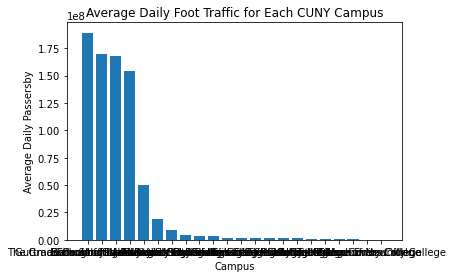

In [217]:
## Plot average daily traffic totals for all campuses
plt.bar(sorted_totals_per_campus['campus'], sorted_totals_per_campus['totals'])
plt.title("Average Daily Foot Traffic for Each CUNY Campus")
plt.xlabel("Campus")
plt.ylabel("Average Daily Passersby")
plt.savefig('All_CUNY_avg_traffic.png')
plt.show()

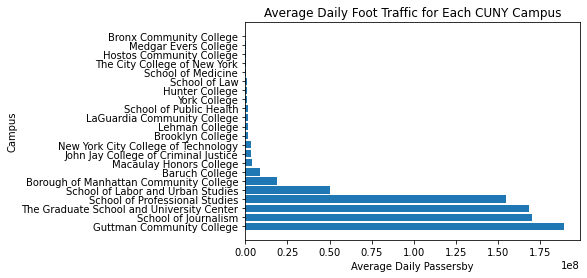

In [222]:
## Try it horizontal so the names are legible!
plt.barh(sorted_totals_per_campus['campus'], sorted_totals_per_campus['totals'])
plt.title("Average Daily Foot Traffic for Each CUNY Campus")
plt.xlabel("Average Daily Passersby")
plt.ylabel("Campus")
plt.savefig('All_CUNY_avg_traffic_horiz.png')
plt.show()

In [225]:
## Top five campuses
top_5 = sorted_totals_per_campus.loc[0:4, :]
top_5.head()

,campus,totals
0,Guttman Community College,189118878.0
1,School of Journalism,169953593.0
2,The Graduate School and University Center,168130759.0
3,School of Professional Studies,154476893.0
4,School of Labor and Urban Studies,50258223.0


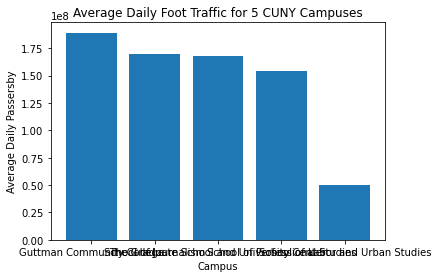

In [226]:
## Plot top five campuses, the answer to the question
plt.bar(top_5['campus'], top_5['totals'])
plt.title("Average Daily Foot Traffic for 5 CUNY Campuses")
plt.xlabel("Campus")
plt.ylabel("Average Daily Passersby")
plt.savefig('Top_5_CUNY_avg_traffic.png')
plt.show()

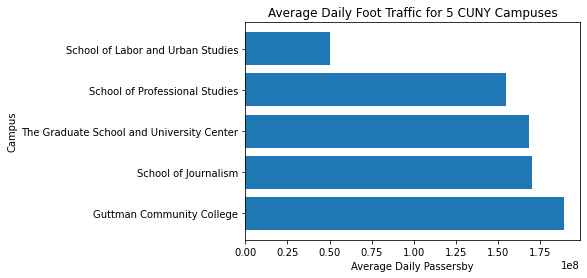

In [227]:
## Try it horizontal so the schools are legible
plt.barh(top_5['campus'], top_5['totals'])
plt.title("Average Daily Foot Traffic for 5 CUNY Campuses")
plt.xlabel("Average Daily Passersby")
plt.ylabel("Campus")
plt.savefig('Top_5_CUNY_avg_traffic_horiz.png')
plt.show()

In [213]:
sorted_totals_per_campus.head()

,campus,totals
0,Guttman Community College,189118878.0
1,School of Journalism,169953593.0
2,The Graduate School and University Center,168130759.0
3,School of Professional Studies,154476893.0
4,School of Labor and Urban Studies,50258223.0


In [214]:
## See how many stations contributed to the totals for each campus
how_many_pooled = counts_distances.groupby('campus').un_name.count()

In [216]:
how_many_pooled.sort_values(ascending = False)

campus
School of Professional Studies               12
The Graduate School and University Center    10
Guttman Community College                    10
School of Labor and Urban Studies            10
Borough of Manhattan Community College        9
School of Journalism                          8
Baruch College                                7
Medgar Evers College                          6
New York City College of Technology           5
School of Public Health                       5
Macaulay Honors College                       4
School of Medicine                            4
The City College of New York                  4
Hunter College                                3
Brooklyn College                              3
Bronx Community College                       3
LaGuardia Community College                   2
Lehman College                                2
John Jay College of Criminal Justice          2
School of Law                                 2
Hostos Community College         